<a href="https://colab.research.google.com/github/ananthojusankethkumar/Emotion_detection_using_opencv/blob/main/Emotion_detection_using_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#get the data from
!wget https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0

#Unzip the dta
!unzip train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b -d data/

--2025-11-02 15:41:49--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5cc45171129db460de30401a60.dl.dropboxusercontent.com/cd/0/inline/C0arwkRDCGVtTj7YpkjaiYsILK6NW5IwkKUuezfnG_zk3C9Dkwzdf3tbu-dwP80dh3OLeP12uHEL8lWkAEd8AL9sQiNNPZS-dRHsN9GFKcRnTizNIaQfpmte1EEO0AMGn8QXW_Ggfd9B22VwLW5ez5za/file# [following]
--2025-11-02 15:41:50--  https://uc5cc45171129db460de30401a60.dl.dropboxusercontent.com/cd/0/inline/C0arwkRDCGVtTj7YpkjaiYsILK6NW5IwkKUuezfnG_zk3C9Dkwzdf3tbu-dwP80dh3OLeP12uHEL8lWkAEd8AL9sQiNNPZS-dRHsN9GFKcRnTizNIaQfpmte1EEO0AMGn8QXW_Ggfd9B22VwLW5ez5za/file
Resolving uc5cc45171129db460de30401a60.dl.dropboxusercontent.com (uc5cc45171129db460de30401a60.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.callbacks import ModelCheckpoint

In [ ]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units = 7, activation = 'softmax' )(x)

#creating model

model = Model(inputs = base_model.input, outputs = x)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │       175,623 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,890,311 (56.80 MB)

 Trainable params: 175,623 (686.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Preparing our data
train_data = image_dataset_from_directory(
    'data/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    interpolation='nearest',
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=42
)

# Print the class names
print(train_data.class_names)

Found 350 files belonging to 7 classes.
Using 280 files for training.
['Angry', 'Disguist', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [ ]:
val_data = image_dataset_from_directory(
    'data/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    interpolation='nearest',
    batch_size=32,
    shuffle=False, # Usually no need to shuffle validation data
    validation_split=0.2,
    subset='validation',
    seed=42
)

Found 350 files belonging to 7 classes.
Using 70 files for validation.


In [ ]:
!ls data/train

Angry  Disguist  Fear  Happy  Neutral  Sad  Surprise


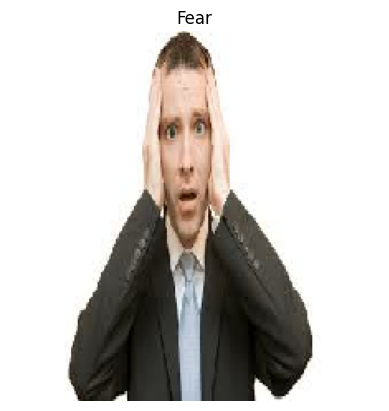

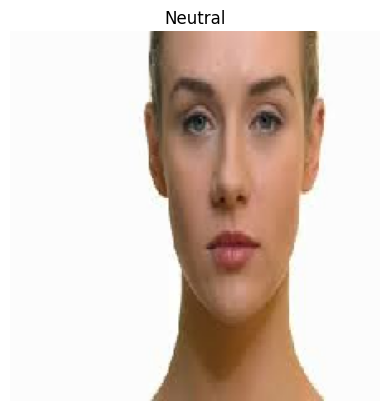

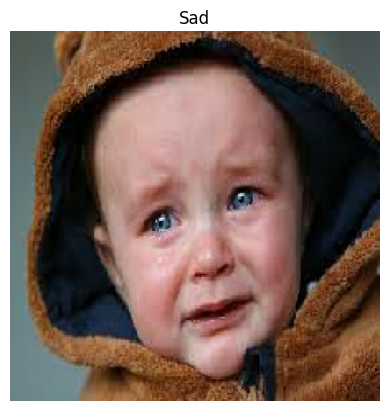

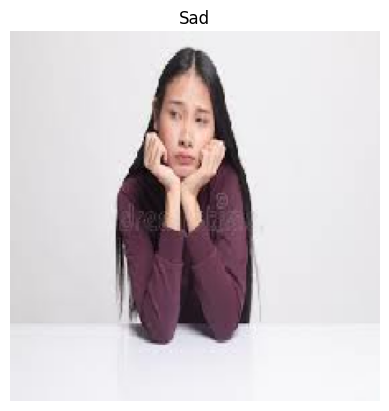

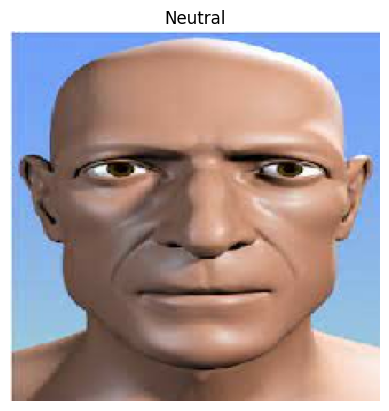

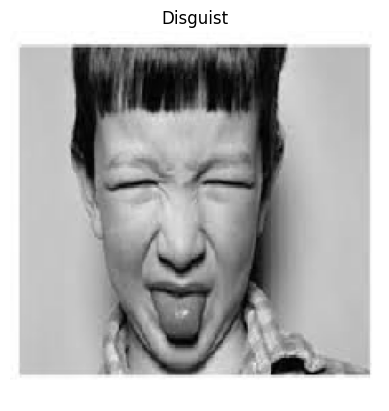

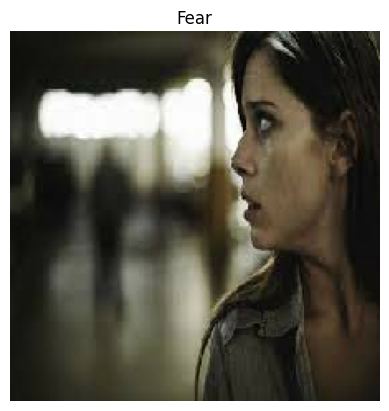

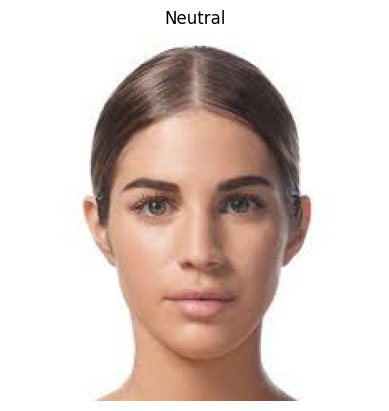

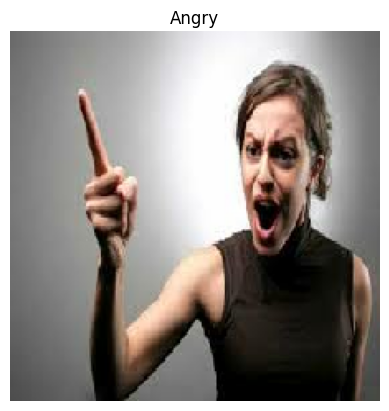

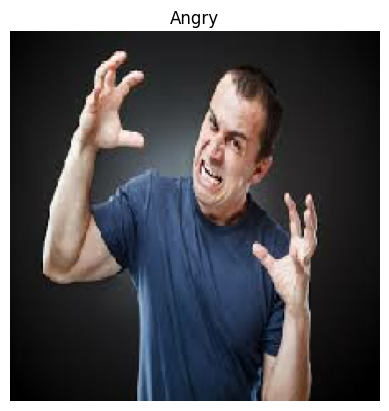

In [ ]:
# Data visualization

# Get a batch of images and labels from the training data
t_img, label = next(iter(train_data))

# function when called will plot the images
def plotimages(img_arr, label):
  """
  input  :- images array, one-hot encoded labels
  output :- plots the images with class names as titles
  """
  count = 0
  # Get the class names from the training dataset
  class_names = train_data.class_names
  for im, l in zip(img_arr, label):
    # Convert one-hot encoded label to class index
    label_index = tf.argmax(l).numpy()
    # Get the class name
    class_name = class_names[label_index]
    plt.imshow(im.numpy().astype("uint8"))
    plt.title(class_name)
    plt.axis("off") # Use "off" to turn off axis
    plt.show()

    count += 1
    if count == 10:
      break

# Uncomment the line below to plot images
plotimages(t_img, label)

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, verbose=1, patience=2,mode = 'auto')

mc = ModelCheckpoint(filepath="model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

cb = [es, mc]
#putting callback in a list

In [ ]:
hist = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[es,mc])

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.1846 - loss: 23.9352 
Epoch 1: val_accuracy improved from -inf to 0.52857, saving model to model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 218s 24s/step - accuracy: 0.1879 - loss: 24.1300 - val_accuracy: 0.5286 - val_loss: 15.0808
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6837 - loss: 9.2324 
Epoch 2: val_accuracy improved from 0.52857 to 0.88571, saving model to model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 293s 28s/step - accuracy: 0.6929 - loss: 8.8854 - val_accuracy: 0.8857 - val_loss: 2.4599
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.9069 - loss: 0.9667 
Epoch 3: val_accuracy improved from 0.88571 to 0.91429, saving model to model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 231s 25s/step - accuracy: 0.9062 - loss: 0.9780 - val_accuracy: 0.9143 - val_loss: 2.7608
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.9953 - loss: 0.0373 
Epoch 4: val_accuracy did not improve from 0.91429
9/9 ━━━━━━━━━━━━━━━━━━━━ 250s 29s/step - accuracy: 0.9944 - loss: 0.0566 - val_accuracy: 0.9143 - val_loss: 3.6800
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.9830 - loss: 0.0407 
Epoch 5: val_accuracy did not improve from 0.91429
9/9 ━━━━━━━━━━━━━━━━━━━━ 221s 24s/step - accuracy: 0.9836 - loss: 0.0390 - val_accuracy: 0.9143 - val_loss: 3.9237
Epoch 5: early stopping


In [37]:
#loading the best model

from keras.models import load_model
model = load_model("/content/model.h5")

In [39]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

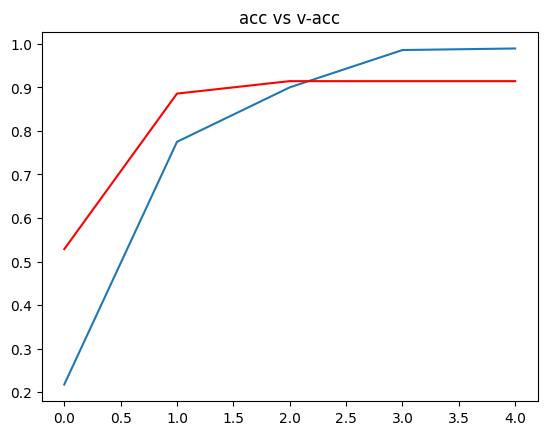

In [40]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

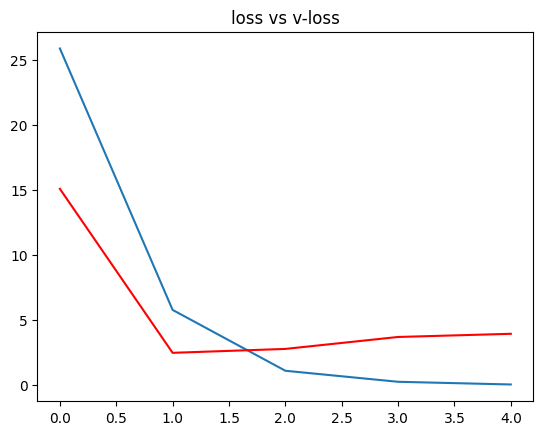

In [41]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()


In [43]:
# Just to mapp out the o/p values

# The class names were already obtained from the train_data object and printed in the output
# of the cell where train_data was created. We can use that output to create the dictionary.
class_names = ['Angry', 'Disguist', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
op = dict(enumerate(class_names))

In [ ]:
#path for the image to see if it predicts correct class